In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#Carga el DtaSet
df = pd.read_csv('../dashboard/data/musica_y_salud_mental.csv')

In [48]:
#Dimensiones del DataSet
df.shape

(736, 33)

In [49]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [50]:
#Sacar todos los nombres de las columnas en una lista
columnas = df.columns.tolist()
print(columnas)

['Timestamp', 'Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions']


In [51]:
#Borrar la columna Timestamp ya que no es relevante para el analisis
df = df.drop('Timestamp', axis = 1)

In [52]:
#Se borra la columna Permissions ya que no es relevante para el analisis
df = df.drop('Permissions', axis = 1)

In [53]:
columnas = df.columns.tolist()
print(columnas)

['Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']


MANEJO DE VALORES FALTANTES

In [54]:
#Funciones que se repetiran mucho
def tipo_de_datos_columna(columna):
    dtype = df[columna].dtype
    print(f'Tipo de datos de la columna {columna}: {dtype}')

def cambiar_tipo_de_datos(columna, tipo):
    df[columna] = df[columna].astype(tipo)
    print(f'Tipo de datos de la columna {columna} cambiado a {tipo}')

def conteo_valores_faltantes():
    df.isnull().sum()
    plt.figure(figsize=(22,4))
    sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='mako', annot=True,
             fmt='0.0f').set_title('Conteo de Valores Nulos', fontsize=18)
    plt.show()

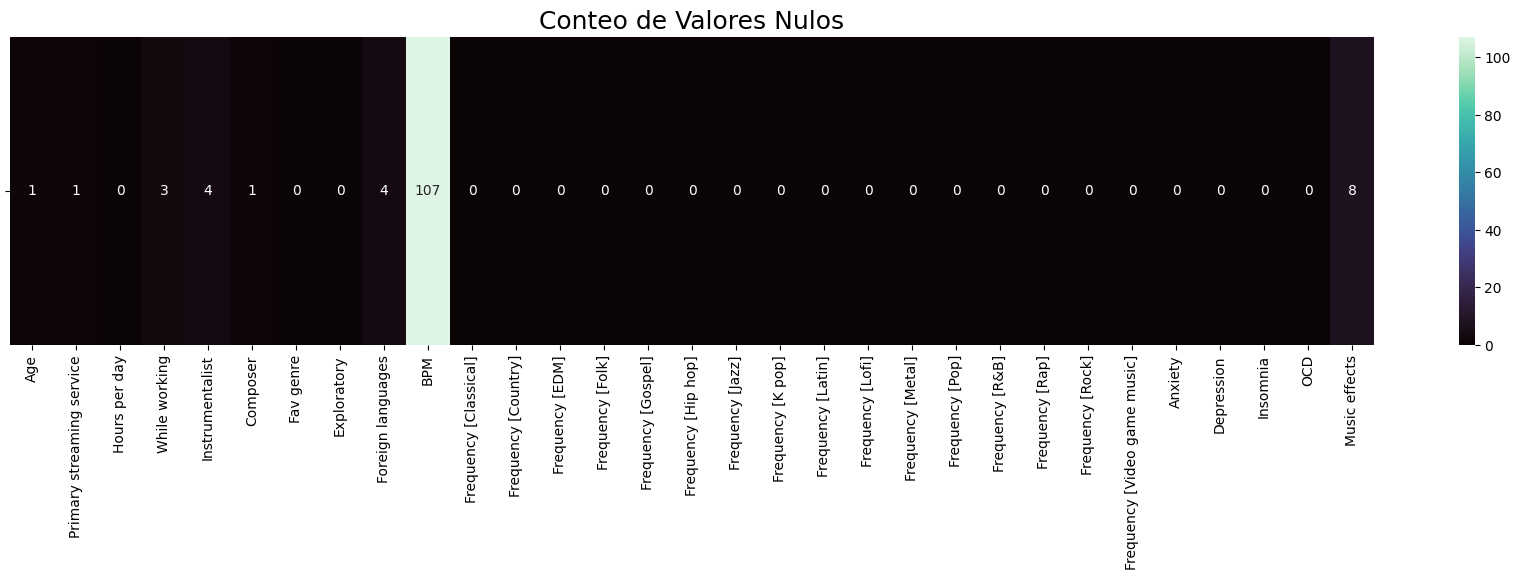

In [55]:
#Valores nulos del DataFrame
conteo_valores_faltantes()

Columna "Age": Esta columna correspondiente a la edad del encuestado

In [56]:
df['Age'].head()

0    18.0
1    63.0
2    18.0
3    61.0
4    18.0
Name: Age, dtype: float64

In [57]:
#Tipo de datos de la columna "Age"
tipo_de_datos_columna('Age')

Tipo de datos de la columna Age: float64


In [58]:
#Para la columna "Age", como solo hay un valor nulo, se remplazara con la mediana de la columna
df['Age'] = df['Age'].fillna(df['Age'].median())

#Cambiar el tipo de datos de la columna "Age" a entero
cambiar_tipo_de_datos('Age', 'int')

Tipo de datos de la columna Age cambiado a int


Columna "Primary streaming service": Esta columna hace referencia a la aplicacion o plataforma con la que el encuestado escucha musica. 

In [59]:
df['Primary streaming service'].head()

0          Spotify
1          Pandora
2          Spotify
3    YouTube Music
4          Spotify
Name: Primary streaming service, dtype: object

In [60]:
#Tipo de datos de la columna "Primary streaming service"
tipo_de_datos_columna('Primary streaming service')

Tipo de datos de la columna Primary streaming service: object


In [61]:
#Para la columna "Primary streaming service", se rellenaran los valores nulos con la moda de la columna
df['Primary streaming service'] = df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0])

#Cambiar el tipo de datos de la columna "Primary streaming service" a category
cambiar_tipo_de_datos('Primary streaming service', 'category')

Tipo de datos de la columna Primary streaming service cambiado a category


Columna "While working": Esta columna hace referencia a si el encuestado escucha musica mientras estudia o trabaja.

In [62]:
df['While working'].head()

0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: While working, dtype: object

In [63]:
#Tipo de datos de la columna "While working"
tipo_de_datos_columna('While working')

Tipo de datos de la columna While working: object


In [64]:
#Para la columna "While working", se rellenaran los valores nulos con la moda de la columna
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])

#Cambiar el tipo de datos de la columna "Primary streaming service"a category
cambiar_tipo_de_datos('While working', 'category')

Tipo de datos de la columna While working cambiado a category


Columna "Instrumentalist": Esta columna hace referencia a si el encuestado toca algun intrumento frecuentemente.

In [65]:
df['Instrumentalist'].head()

0    Yes
1     No
2     No
3     No
4     No
Name: Instrumentalist, dtype: object

In [66]:
#Tipos de datos de la columna "Instrumentalist"
tipo_de_datos_columna('Instrumentalist')

Tipo de datos de la columna Instrumentalist: object


In [67]:
#Para la columna "Instrumentalis", se rellenaran los valores nulos con la moda de la columna
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])

#Cambiar el tipo de datos de la columna "Instrumentalist" a category
cambiar_tipo_de_datos('Instrumentalist', 'category')

Tipo de datos de la columna Instrumentalist cambiado a category


Columna "Composer": Esta columna hace referencia a si el encuestado compone musica.

In [68]:
df['Composer'].head()

0    Yes
1     No
2     No
3    Yes
4     No
Name: Composer, dtype: object

In [69]:
#Tipos de datos de la columna "Composer"
tipo_de_datos_columna('Composer')

Tipo de datos de la columna Composer: object


In [70]:
#Para la columna "Composer", se rellenaran los valores nulos con la moda de la columna
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])

#Cambiar el tipo de datos de la columna "Composer" a category
cambiar_tipo_de_datos('Composer', 'category')

Tipo de datos de la columna Composer cambiado a category


Columna "Foreign languages": Esta columna hace referencia a si el encuentado escucha musica en otros lenguajes.

In [71]:
df['Foreign languages'].head()

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: Foreign languages, dtype: object

In [72]:
#Tipos de datos de la columna "Composer"
tipo_de_datos_columna('Foreign languages')

Tipo de datos de la columna Foreign languages: object


In [73]:
#Para la columna "Foreign languages", se rellenaran los valores nulos con la moda de la columna
df['Foreign languages'] = df['Foreign languages'].fillna(df['Foreign languages'].mode()[0])

#Cambiar el tipo de datos de la columna "Foreign languages" a category
cambiar_tipo_de_datos('Foreign languages', 'category')

Tipo de datos de la columna Foreign languages cambiado a category


Columna "BPM": Esta columna hace referencia a 

In [74]:
df['BPM'].head()

0    156.0
1    119.0
2    132.0
3     84.0
4    107.0
Name: BPM, dtype: float64

In [75]:
#Tipo de datos de la columna "BPM"
tipo_de_datos_columna('BPM')

Tipo de datos de la columna BPM: float64


In [76]:
#Rellenar los valores nulos en la columna BPM con la mediana de la columna
df['BPM'] = df['BPM'].fillna(df['BPM'].median())

cambiar_tipo_de_datos('BPM', 'int')

Tipo de datos de la columna BPM cambiado a int


Columna "Music effects": Esta columna hace referencia a si la musica empeora o mejora la salud mental del encuestado.

In [77]:
df['Music effects'].head()

0          NaN
1          NaN
2    No effect
3      Improve
4      Improve
Name: Music effects, dtype: object

In [78]:
#Tipos de datos de la columna "Music effects"
tipo_de_datos_columna('Music effects')

Tipo de datos de la columna Music effects: object


In [79]:
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])

#Cambiar el tipo de datos de la columna "Music effects" a category
cambiar_tipo_de_datos('Music effects', 'category')

Tipo de datos de la columna Music effects cambiado a category


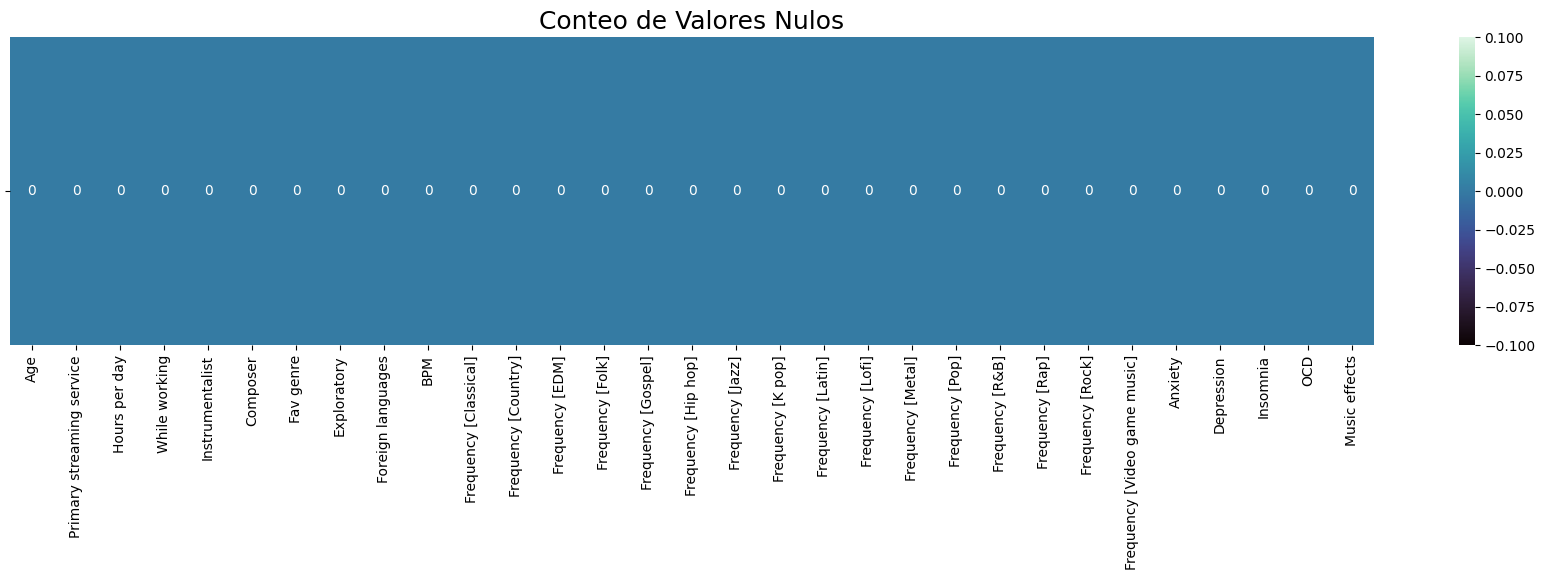

In [80]:
#Mirar si hay valores nulos en el DataFrame
conteo_valores_faltantes()

In [81]:
df.shape

(736, 31)

In [82]:
df.dtypes

Age                                int64
Primary streaming service       category
Hours per day                    float64
While working                   category
Instrumentalist                 category
Composer                        category
Fav genre                         object
Exploratory                       object
Foreign languages               category
BPM                                int64
Frequency [Classical]             object
Frequency [Country]               object
Frequency [EDM]                   object
Frequency [Folk]                  object
Frequency [Gospel]                object
Frequency [Hip hop]               object
Frequency [Jazz]                  object
Frequency [K pop]                 object
Frequency [Latin]                 object
Frequency [Lofi]                  object
Frequency [Metal]                 object
Frequency [Pop]                   object
Frequency [R&B]                   object
Frequency [Rap]                   object
Frequency [Rock]

In [83]:
#Cambiar los tipos de datos de todas las columnas de tipo object
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [84]:
df.dtypes

Age                                int64
Primary streaming service       category
Hours per day                    float64
While working                   category
Instrumentalist                 category
Composer                        category
Fav genre                       category
Exploratory                     category
Foreign languages               category
BPM                                int64
Frequency [Classical]           category
Frequency [Country]             category
Frequency [EDM]                 category
Frequency [Folk]                category
Frequency [Gospel]              category
Frequency [Hip hop]             category
Frequency [Jazz]                category
Frequency [K pop]               category
Frequency [Latin]               category
Frequency [Lofi]                category
Frequency [Metal]               category
Frequency [Pop]                 category
Frequency [R&B]                 category
Frequency [Rap]                 category
Frequency [Rock]

In [85]:
#Cambiar los tipos de datos de todas las columnas de tipo float a int
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('int')

In [86]:
df.dtypes

Age                                int64
Primary streaming service       category
Hours per day                      int64
While working                   category
Instrumentalist                 category
Composer                        category
Fav genre                       category
Exploratory                     category
Foreign languages               category
BPM                                int64
Frequency [Classical]           category
Frequency [Country]             category
Frequency [EDM]                 category
Frequency [Folk]                category
Frequency [Gospel]              category
Frequency [Hip hop]             category
Frequency [Jazz]                category
Frequency [K pop]               category
Frequency [Latin]               category
Frequency [Lofi]                category
Frequency [Metal]               category
Frequency [Pop]                 category
Frequency [R&B]                 category
Frequency [Rap]                 category
Frequency [Rock]

In [87]:
#Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('../dashboard/data/musica_y_salud_mental_limpio.csv', index=False)